In [1]:
! cp -r /content/drive/My\ Drive/machine_learning/ /content

In [2]:
import os
os.chdir("/content/machine_learning")

In [3]:
import cnn_models
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from model_utils import ModelUtils, ModelAnalytics
from data_loader import FeatureDataset

plt.style.use('default')
drive_dir = "/content/drive/My Drive/machine_learning"
pth_dir = f"{drive_dir}/pths"
loss_dir = f"{drive_dir}/losses"

In [4]:
train_dataset = FeatureDataset("mel_stft", "train")
validate_dataset = FeatureDataset("mel_stft", "validate")
test_dataset = FeatureDataset("mel_stft", "test")

criterion = nn.CrossEntropyLoss()

In [5]:
model = cnn_models.MelCNNFreq().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [6]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_freq_mel_stft/epoch_0.pth
3min 20.4s, EPOCH 5/50, Loss: 356.99, Total time: 200.342, Transfer time: 4.413, Train time: 83.347
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_freq_mel_stft/epoch_5.pth
5min 2.1s, EPOCH 10/50, Loss: 329.52, Total time: 101.671, Transfer time: 4.316, Train time: 79.29
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_freq_mel_stft/epoch_10.pth
6min 43.8s, EPOCH 15/50, Loss: 313.06, Total time: 101.671, Transfer time: 4.324, Train time: 79.321
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_freq_mel_stft/epoch_15.pth
8min 25.7s, EPOCH 20/50, Loss: 299.4, Total time: 101.802, Transfer time: 4.335, Train time: 79.358
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_freq_mel_stft/epoch_20.pth
10min 7.5s, EPOCH 25/50, Loss: 284.52, Total time: 101.814, Transfer time: 4.345, Train time

Evaluating pths for epochs:  0 (0min 37.1s), 5 (0min 48.0s), 10 (0min 58.9s), 15 (1min 9.7s), 20 (1min 20.5s), 25 (1min 31.3s), 30 (1min 42.2s), 35 (1min 53.1s), 40 (2min 4.0s), 45 (2min 14.8s), 50 (2min 25.6s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.4969 at epoch 15
Maximum validate accuracy: 0.4613 at epoch 15
Maximum test accuracy: 0.42 at epoch 15

AT EPOCH 15
Macro Test AUC: 0.7587, Accuracy: 0.42

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8344, Accuracy of 0.72
 - Experimental: AUC of 0.636, Accuracy of 0.11
 - Folk: AUC of 0.7932, Accuracy of 0.24
 - Hip-Hop: AUC of 0.9234, Accuracy of 0.67
 - Instrumental: AUC of 0.7794, Accuracy of 0.31
 - International: AUC of 0.7031, Accuracy of 0.55
 - Pop: AUC of 0.5613, Accuracy of 0.03
 - Rock: AUC of 0.8301, Accuracy of 0.73


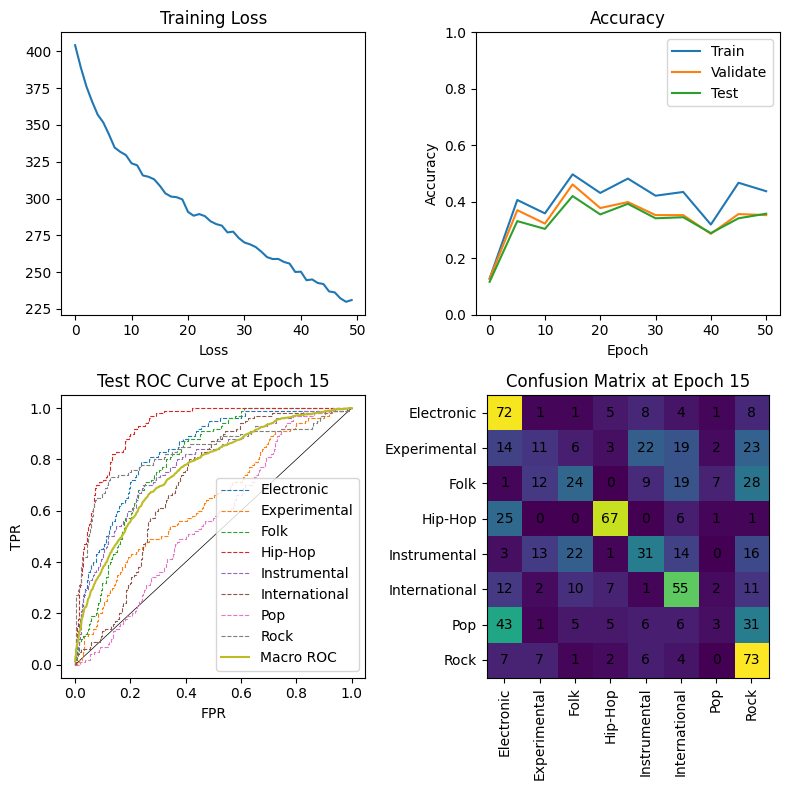

In [7]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [8]:
model = cnn_models.MelCNNTemporal().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [9]:
mutils.train(n_epochs=50, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_temporal_mel_stft/epoch_0.pth
0min 41.9s, EPOCH 5/50, Loss: 352.3, Total time: 41.826, Transfer time: 4.915, Train time: 18.804
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_temporal_mel_stft/epoch_5.pth
1min 23.9s, EPOCH 10/50, Loss: 334.74, Total time: 42.037, Transfer time: 4.964, Train time: 18.911
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_temporal_mel_stft/epoch_10.pth
2min 5.9s, EPOCH 15/50, Loss: 314.29, Total time: 41.897, Transfer time: 4.923, Train time: 18.911
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_temporal_mel_stft/epoch_15.pth
2min 47.8s, EPOCH 20/50, Loss: 293.46, Total time: 41.922, Transfer time: 4.925, Train time: 18.914
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_temporal_mel_stft/epoch_20.pth
3min 29.8s, EPOCH 25/50, Loss: 273.25, Total time: 41.928, Transfer time: 4

Evaluating pths for epochs:  0 (0min 6.6s), 5 (0min 13.0s), 10 (0min 19.4s), 15 (0min 25.8s), 20 (0min 32.2s), 25 (0min 38.5s), 30 (0min 44.9s), 35 (0min 51.2s), 40 (0min 57.6s), 45 (1min 3.9s), 50 (1min 10.2s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.7211 at epoch 45
Maximum validate accuracy: 0.4225 at epoch 40
Maximum test accuracy: 0.3587 at epoch 40

AT EPOCH 40
Macro Test AUC: 0.7057, Accuracy: 0.3587

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.7877, Accuracy of 0.45
 - Experimental: AUC of 0.5928, Accuracy of 0.2
 - Folk: AUC of 0.6951, Accuracy of 0.3
 - Hip-Hop: AUC of 0.8637, Accuracy of 0.6
 - Instrumental: AUC of 0.744, Accuracy of 0.33
 - International: AUC of 0.6847, Accuracy of 0.32
 - Pop: AUC of 0.49, Accuracy of 0.19
 - Rock: AUC of 0.7788, Accuracy of 0.48


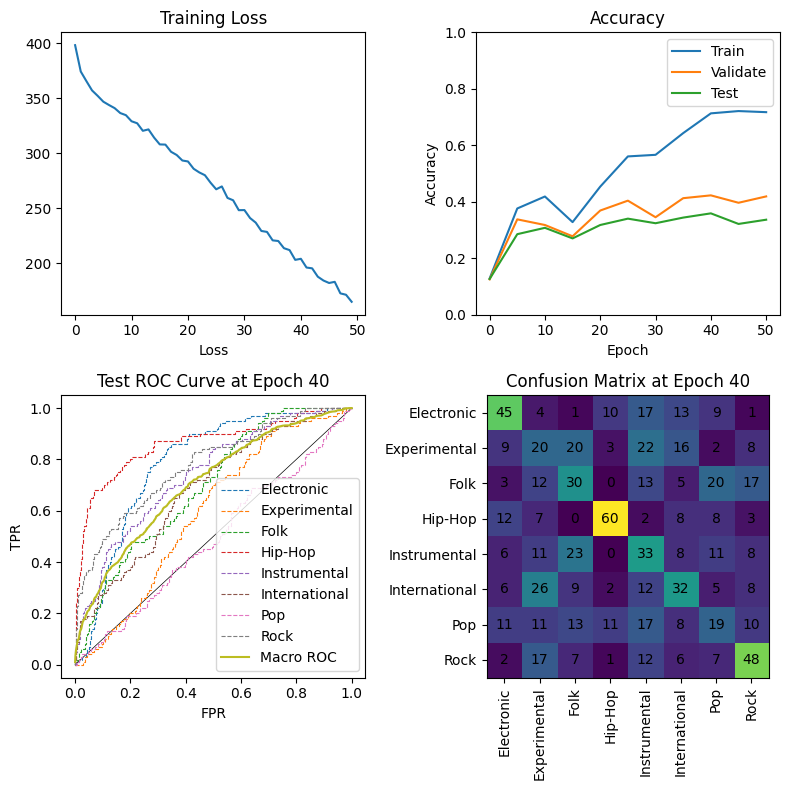

In [10]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=50, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)

In [14]:
model = cnn_models.MelCNNSquare().cuda()
optimizer = optim.Adam(model.parameters(), lr=0.001)
mutils = ModelUtils(
    model, criterion, optimizer, train_dataset,
    cuda=True, load_workers=0
)

In [15]:
mutils.train(n_epochs=100, pth_dir=pth_dir, loss_dir=loss_dir)

Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_square_mel_stft/epoch_0.pth
1min 28.2s, EPOCH 5/100, Loss: 370.22, Total time: 88.169, Transfer time: 4.717, Train time: 65.012
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_square_mel_stft/epoch_5.pth
2min 56.4s, EPOCH 10/100, Loss: 349.3, Total time: 88.19, Transfer time: 4.705, Train time: 65.035
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_square_mel_stft/epoch_10.pth
4min 24.5s, EPOCH 15/100, Loss: 329.57, Total time: 88.087, Transfer time: 4.681, Train time: 65.015
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_square_mel_stft/epoch_15.pth
5min 52.5s, EPOCH 20/100, Loss: 317.73, Total time: 87.955, Transfer time: 4.683, Train time: 64.992
Saved model state as /content/drive/My Drive/machine_learning/pths/mel_cnn_square_mel_stft/epoch_20.pth
7min 20.4s, EPOCH 25/100, Loss: 296.35, Total time: 87.904, Transfer time: 4.617,

Evaluating pths for epochs:  0 (0min 9.3s), 5 (0min 19.0s), 10 (0min 28.7s), 15 (0min 38.4s), 20 (0min 48.1s), 25 (0min 57.8s), 30 (1min 7.5s), 35 (1min 17.1s), 40 (1min 26.9s), 45 (1min 36.7s), 50 (1min 46.4s), 55 (1min 56.0s), 60 (2min 5.7s), 65 (2min 15.4s), 70 (2min 25.0s), 75 (2min 34.8s), 80 (2min 44.5s), 85 (2min 54.2s), 90 (3min 3.9s), 95 (3min 13.6s), 100 (3min 23.3s), Done.
torch.Size([800]) torch.Size([800, 8])
ACCURACIES
Maximum train accuracy: 0.7536 at epoch 95
Maximum validate accuracy: 0.4162 at epoch 55
Maximum test accuracy: 0.4 at epoch 40

AT EPOCH 40
Macro Test AUC: 0.7437, Accuracy: 0.4

INDIVIDUAL TEST AUC AND ACCURACY
 - Electronic: AUC of 0.8038, Accuracy of 0.57
 - Experimental: AUC of 0.6071, Accuracy of 0.1
 - Folk: AUC of 0.8059, Accuracy of 0.39
 - Hip-Hop: AUC of 0.9007, Accuracy of 0.57
 - Instrumental: AUC of 0.7983, Accuracy of 0.65
 - International: AUC of 0.667, Accuracy of 0.2
 - Pop: AUC of 0.4936, Accuracy of 0.02
 - Rock: AUC of 0.8645, Accuracy 

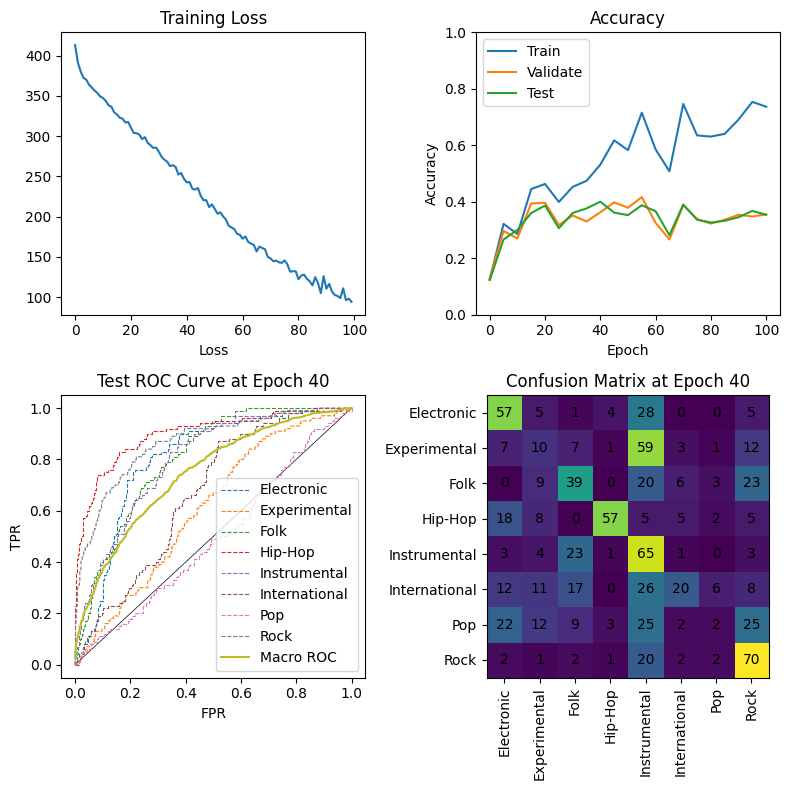

In [16]:
ma = ModelAnalytics(model, (train_dataset, validate_dataset, test_dataset), n_epochs=100, cuda=True)
ma.evaluate_pths(pth_dir=pth_dir)
ma.make_plots(loss_dir=loss_dir)